In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from scipy.stats.distributions import chi2
import warnings
warnings.filterwarnings('ignore')
from arch import arch_model

In [4]:
raw_data = yf.download(tickers = '^NSEI ^SPX', start = '2010-01-01', end = dt.datetime.now(),interval = '1d', group_by = 'ticker',auto_adjust = True, treads = True)
raw_data.head()
df = raw_data.copy()
df['nifty'] = raw_data['^NSEI'].Close[:]
df['spx'] = raw_data['^SPX'].Close[:]
del df['^NSEI']
del df['^SPX']
df['nifty'].fillna(method = 'ffill',inplace = True)
df['spx'].fillna(method = 'ffill',inplace = True)

[*********************100%***********************]  2 of 2 completed


Text(0.5, 1.0, 'Historical Returns')

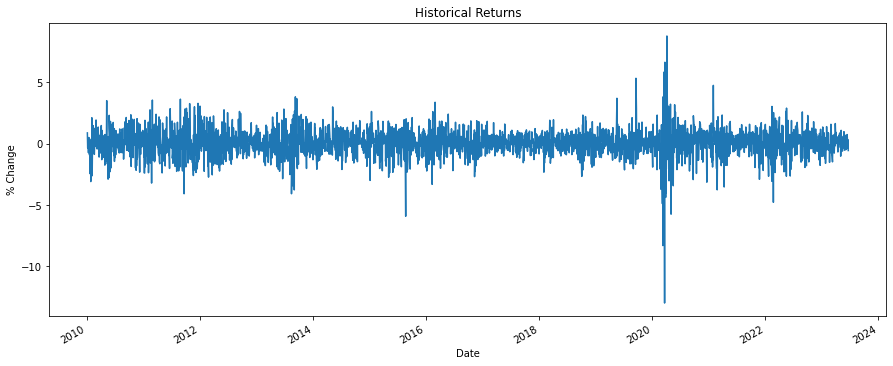

In [5]:
df['Returns'] = df.nifty.pct_change(1)*100
df['Sq Returns'] = df['Returns'].mul(df['Returns'])
df['Returns'][1:].plot(figsize = (15,6))
plt.ylabel('% Change')
plt.title('Historical Returns')

Text(0.5, 1.0, 'Volatility')

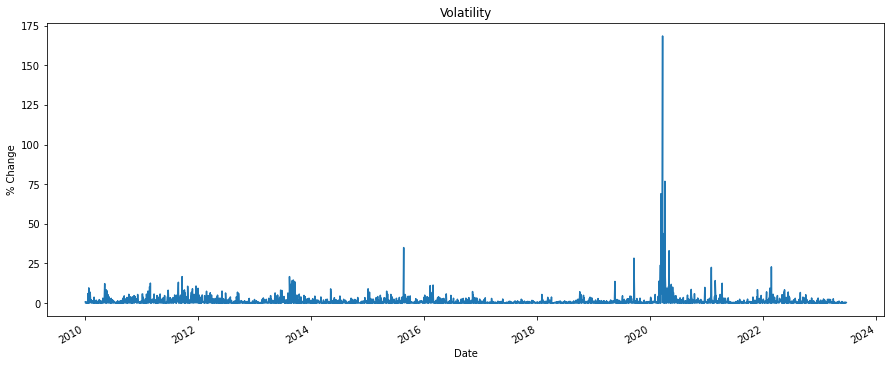

In [6]:
df['Sq Returns'][1:].plot(figsize = (15,6))
plt.ylabel('% Change')
plt.title('Volatility')

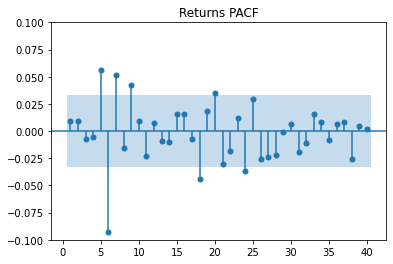

In [7]:
sgt.plot_pacf(df['Returns'][1:],zero = False,lags = 40)
plt.title("Returns PACF")
plt.ylim(-0.1,0.1)
plt.show()

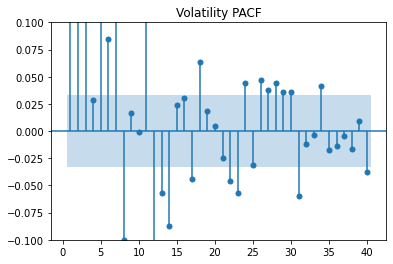

In [8]:
sgt.plot_pacf(df['Sq Returns'][1:],zero = False,lags = 40)
plt.title("Volatility PACF")
plt.ylim(-0.1,0.1)
plt.show()

# ARCH

In [25]:
model_arch_1 = arch_model(df['Returns'][1:], mean = 'constant', vol = 'ARCH', p = 9).fit(update_freq = 5)
model_arch_1.summary()

Iteration:      5,   Func. Count:     72,   Neg. LLF: 5367.887326884319
Iteration:     10,   Func. Count:    141,   Neg. LLF: 4899.677619325028
Iteration:     15,   Func. Count:    209,   Neg. LLF: 4751.691207507506
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4715.570736349147
            Iterations: 19
            Function evaluations: 259
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4715.57
Distribution:                  Normal   AIC:                           9453.14
Method:            Maximum Likelihood   BIC:                           9520.84
                                        No. Observations:                 3478
Date:                Fri, Jun 23 2023   Df Residuals:                     3477
Time:                        20:13:13   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0708  1.528e-02      4.629  3.670e-06 [4.080e-02,  0.101]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.3358  3.459e-02      9.708  2.792e-22     [  0.268,  0.404]
alpha[1]       0.0459  1.804e-02      2.541  1.105e-02 [1.048e-02,8.122e-02]
alpha[2]       0.1053  2.678e-02      3.931  8.462e-05   [5.279e-02,  0.158]
alpha[3]       0.1005  3.369e-02      2.985  2.838e-03   [3.452e-02,  0.167]
alpha[4]       0.0746  2.641e-02      2.826  4.711e-03   [2.287e-02,  0.126]
alpha[5]       0.0491  2.020e-02      2.429  1.516e-02 [9.467e-03,8.865e-02]
alpha[6]       0.0761  2.909e-02      2.618  8.850e-03   [1.914e-02,  0.133]
alpha[7]       0.0824  2.209e-02      3.729  1.921e-04   [3.908e-02,  0.126]
alpha[8]       0.0780  2.982e-02      2.615  8.934e-03   [1.952e-02,  0.136]
alpha[9]       0.0733  2.460e-02      2.979  2.894e-03   [2.507e-02,  0.122]
============================================================================

Covariance estimator: robust
"""

# GARCH

In [38]:
model_garch_56 = arch_model(df['Returns'][1:], mean = 'constant', vol = 'GARCH', p = 5,q = 6).fit(update_freq = 5)
model_garch_56.summary()

Iteration:      5,   Func. Count:     84,   Neg. LLF: 6850.295709961831
Iteration:     10,   Func. Count:    162,   Neg. LLF: 4700.05785045103
Iteration:     15,   Func. Count:    236,   Neg. LLF: 4705.366579696966
Iteration:     20,   Func. Count:    309,   Neg. LLF: 4688.208170371485
Iteration:     25,   Func. Count:    380,   Neg. LLF: 4688.040706003096
Iteration:     30,   Func. Count:    449,   Neg. LLF: 4688.039883212213
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4688.0398828655125
            Iterations: 30
            Function evaluations: 449
            Gradient evaluations: 30


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4688.04
Distribution:                  Normal   AIC:                           9402.08
Method:            Maximum Likelihood   BIC:                           9482.08
                                        No. Observations:                 3478
Date:                Fri, Jun 23 2023   Df Residuals:                     3477
Time:                        20:14:43   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0731  1.504e-02      4.859  1.182e-06 [4.359e-02,  0.103]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0671  5.534e-02      1.212      0.225  [-4.139e-02,  0.176]
alpha[1]       0.0435  1.547e-02      2.811  4.940e-03 [1.316e-02,7.379e-02]
alpha[2]       0.0993  4.136e-02      2.401  1.637e-02   [1.822e-02,  0.180]
alpha[3]       0.0856      0.115      0.743      0.458     [ -0.140,  0.312]
alpha[4]       0.0467  7.814e-02      0.598      0.550     [ -0.106,  0.200]
alpha[5]       0.0138  4.624e-02      0.298      0.766  [-7.686e-02,  0.104]
beta[1]        0.0000      0.929      0.000      1.000     [ -1.821,  1.821]
beta[2]        0.0000      0.526      0.000      1.000     [ -1.031,  1.031]
beta[3]        0.0000      0.203      0.000      1.000     [ -0.398,  0.398]
beta[4]        0.6515      0.233      2.795  5.195e-03     [  0.195,  1.108]
beta[5]        0.0000      0.457      0.000      1.000     [ -0.896,  0.896]
beta[6]        0.0000      0.299      0.000      1.000     [ -0.586,  0.586]
============================================================================

Covariance estimator: robust
"""

In [39]:
def LLR_TEST(mod_1,mod_2,DF = 1):
    L1 = mod_1.loglikelihood
    L2 = mod_2.loglikelihood
    LR = 2*(L2-L1)
    P = chi2.sf(LR,DF).round(3)
    return P

In [40]:
print('Log likelihood of ARCH(1) is:' + str(model_arch_1.loglikelihood))
print('\nLog likelihood of GARCH(5,6) is:' + str(model_garch_56.loglikelihood))

Log likelihood of ARCH(1) is:-4715.570736349147

Log likelihood of GARCH(5,6) is:-4688.0398828655125
